In [1]:
import numpy as np
from preprocessing import ConstantLengthDataGenerator, plot
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data_path = "./data/concatenated"
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (60555,)
y shape: (60555, 1)


In [3]:
X[0]

0      -0.584754
1      -0.584754
2       1.730991
3      -0.584754
4      -0.584754
          ...   
1455   -0.584734
1456   -0.583729
1457   -0.578603
1458    1.732726
1459   -0.584734
Length: 1460, dtype: float64

In [4]:
y[0]

array(['ACSF1_9'], dtype='<U42')

In [5]:
generator = ConstantLengthDataGenerator(
    X, y, batch_size=8, min_length=512, max_length=512
)

In [6]:
X_batch, y_batch = next(generator)
print(X_batch.shape)

(8, 512)


In [7]:
y_batch

array([['GesturePebbleZ2_5'],
       ['AllGestureWiimoteZ_8'],
       ['Plane_2'],
       ['PickupGestureWiimoteZ_3'],
       ['Fungi_5'],
       ['ChlorineConcentration_2'],
       ['NonInvasiveFetalECGThorax2_4'],
       ['NonInvasiveFetalECGThorax2_11']], dtype='<U42')

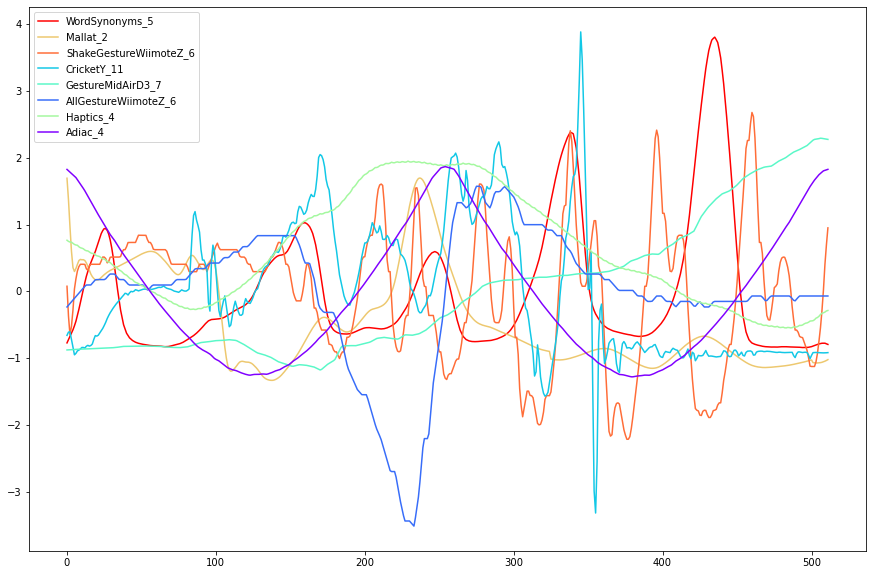

In [44]:
X_batch, y_batch = next(generator)
plot(X_batch, y_batch)
_ = plt.legend(y_batch.ravel())

# Balanced classes

In [9]:
dummy_generator = ConstantLengthDataGenerator(
    X, y, batch_size=8, min_length=1, max_length=1
)
classes = []
for i in range(5000):
    _, y_cnt = next(dummy_generator)
    classes += y_cnt.ravel().tolist()

counts = Counter(classes)
counts

Counter({'FiftyWords_11': 36,
         'Haptics_4': 39,
         'OSULeaf_5': 37,
         'PigAirwayPressure_8': 30,
         'Haptics_1': 37,
         'NonInvasiveFetalECGThorax1_27': 42,
         'Worms_5': 36,
         'PigArtPressure_31': 35,
         'Crop_4': 39,
         'GestureMidAirD2_5': 43,
         'Phoneme_2': 34,
         'MixedShapesSmallTrain_2': 29,
         'GestureMidAirD2_14': 40,
         'MiddlePhalanxOutlineAgeGroup_2': 32,
         'Symbols_2': 45,
         'PigArtPressure_37': 23,
         'PigCVP_41': 40,
         'ShapesAll_37': 29,
         'FiftyWords_47': 39,
         'NonInvasiveFetalECGThorax2_13': 38,
         'Lightning7_4': 49,
         'Adiac_5': 32,
         'NonInvasiveFetalECGThorax1_18': 36,
         'CricketY_2': 32,
         'Fungi_1': 33,
         'FiftyWords_18': 36,
         'ProximalPhalanxTW_4': 29,
         'Phoneme_30': 52,
         'PigCVP_20': 34,
         'WordSynonyms_2': 38,
         'Symbols_3': 41,
         'GestureMidAirD3_26':

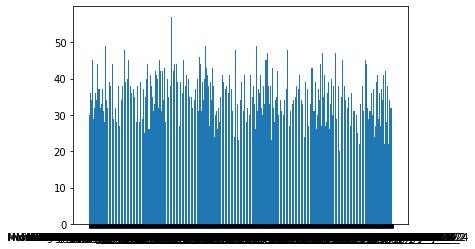

In [10]:
_ = plt.bar(*zip(*counts.items()))

# Data augmentation

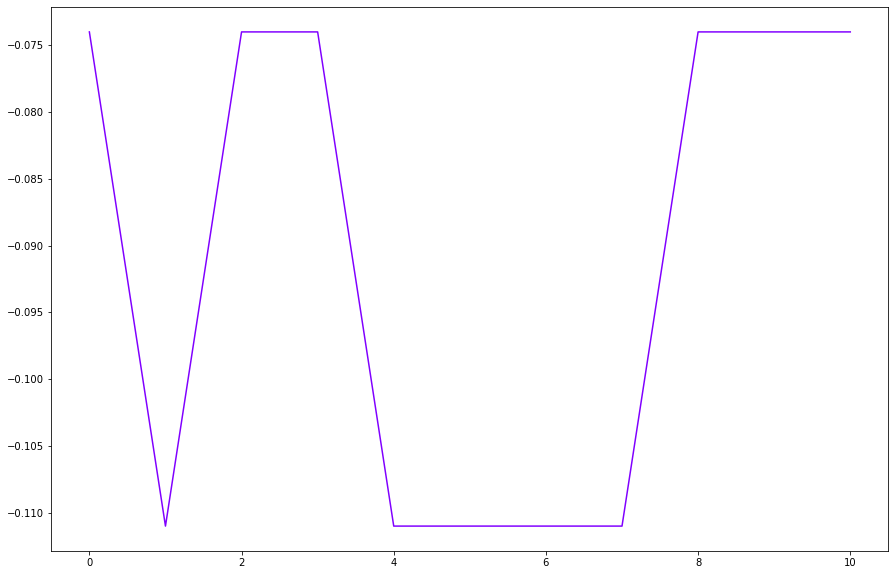

In [12]:
i = 901
plot(X[i].values.reshape(1, -1), y[i].reshape(1, -1))

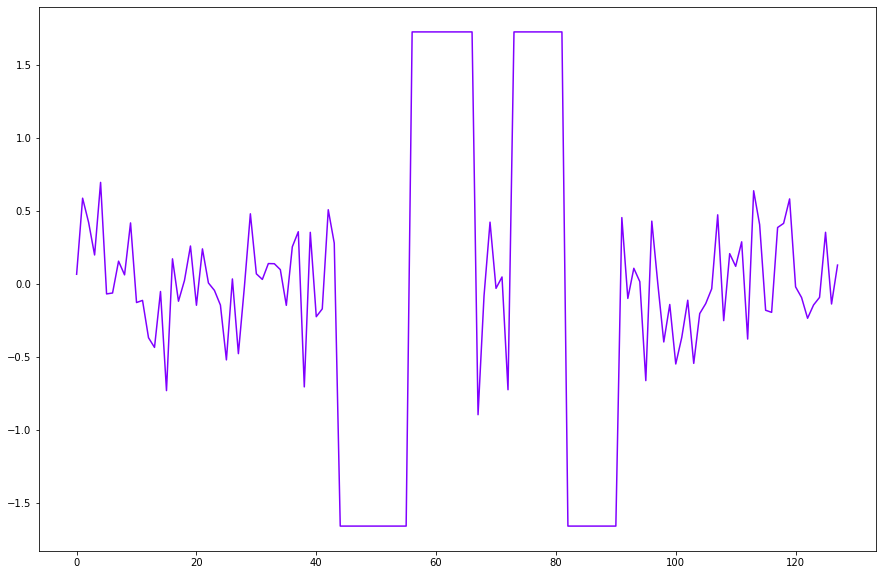

In [13]:
i = 54343
plot(X[i].values.reshape(1, -1), y[i].reshape(1, -1))

In [20]:
selected_indices = [54343, 901]
data_generator = ConstantLengthDataGenerator(
    X[selected_indices],
    y[selected_indices],
    min_length=32,
    max_length=64,
    batch_size=2,
    augmentation=True,
)

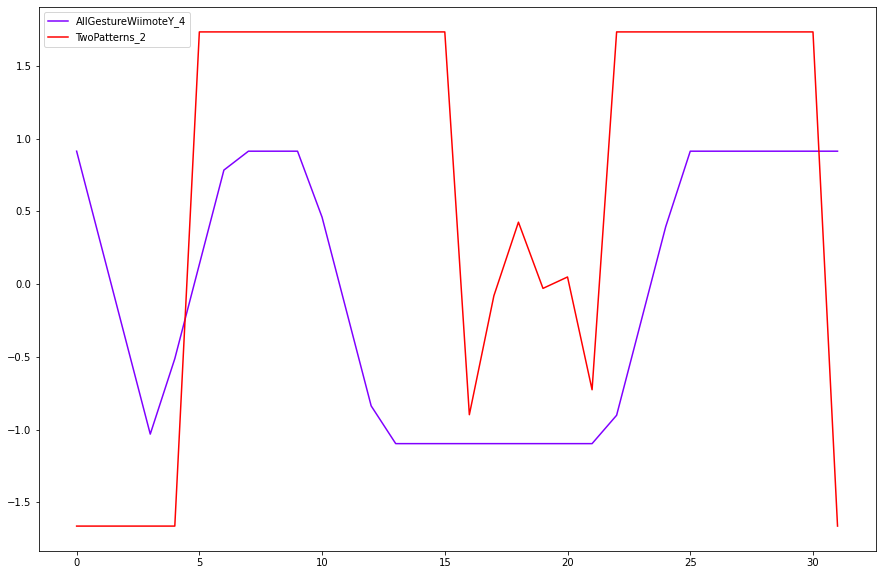

In [22]:
X_generated, y_generated = next(data_generator)
plot(X_generated, y_generated)
_ = plt.legend(y_generated.ravel())

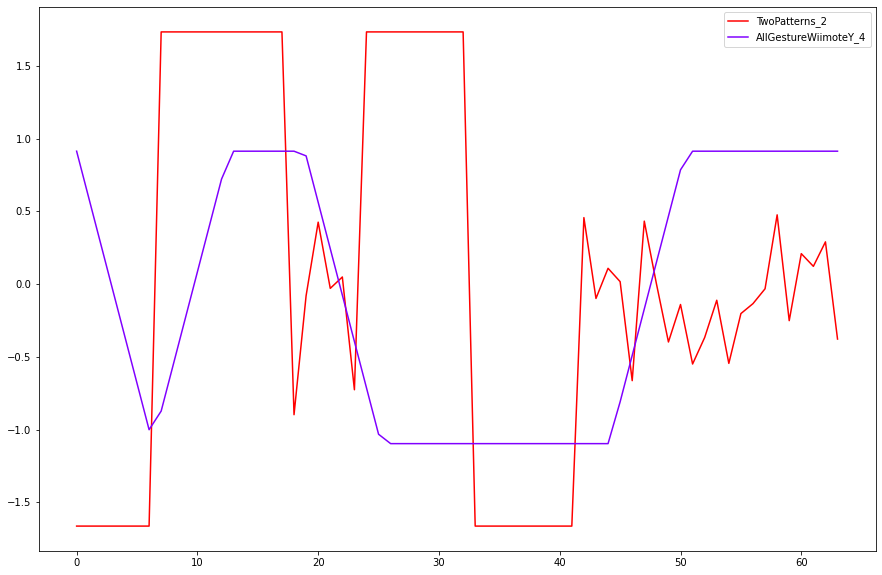

In [23]:
X_generated, y_generated = next(data_generator)
plot(X_generated, y_generated)
_ = plt.legend(y_generated.ravel())

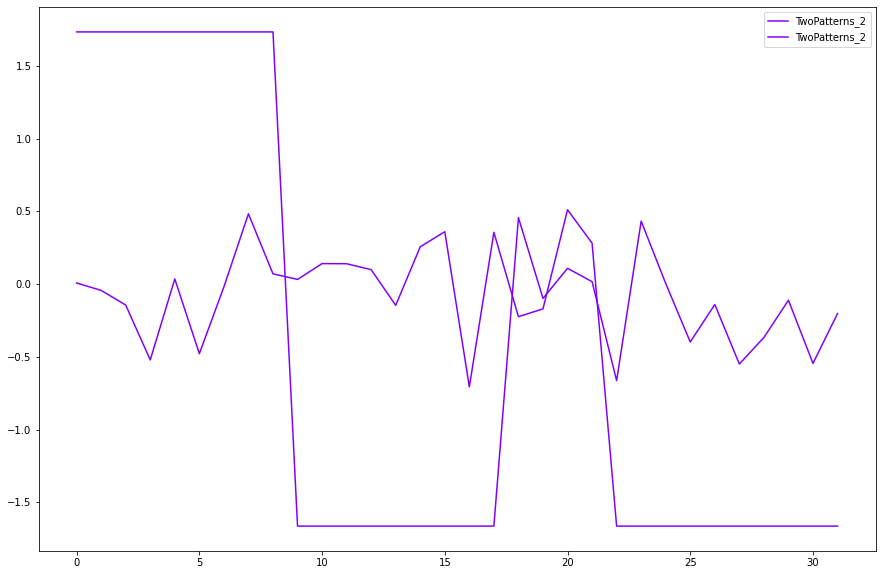

In [30]:
X_generated, y_generated = next(data_generator)
plot(X_generated, y_generated)
_ = plt.legend(y_generated.ravel())

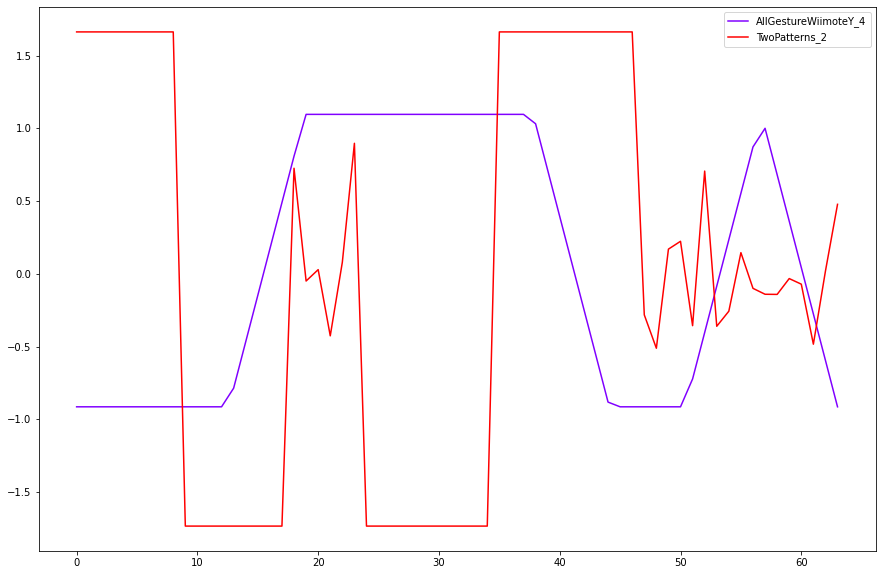

In [42]:
X_generated, y_generated = next(data_generator)
plot(X_generated, y_generated)
_ = plt.legend(y_generated.ravel())